**Temat projektu:**
Analiza predykcyjna maksymalnego osiąganego poziomu tętna na podstawie posiadania choroby serca oraz innych czynników zdrowotnych/cech osobistych za pomocą regresji liniowej.

**Cel analizy badawczej:**
*   zbadanie wpływu różnych czynników zdrowotnych oraz cech na maksymalne osiągane tętno u pacjentów
*   stworzenie modelu regresji, który pozwoli na przewidzenie maksymalnego poziomu tętna na podstawie danych pacjenta
*   indetyfikacja istotnych czynników ryzyka oraz ochrony dla badania maksyamlnego poziomu tętna





In [ ]:
#Import bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
#Wczytanie danych pod zmienna data
data = pd.read_csv("/content/heart.csv.xls")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Podstawowe informacje o zbiorze danych
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Statystyki opisowe dla zbioru danych
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Charakterystyka zbioru**

Wykorzystane przez nas dane składają się z 14 kolumn reprezentujących konkretne zmienne oraz 303 wierszy, w których przechowywane są odpowiednio dane. Jedna ze zmiennych jest typu float, pozostałe to typ int. W praktyce oznacza to, że mamy dane o 303 pacjentach i ich danych zdrowotnych w kontekście chorób serca. Na podstawie powyżej wygenerowanych statytsyk widzimy, że 68% danych, to dane o mężczyznach, średni wiek pacjenta to 54 lata, około 54% pacjentów ma zdiagnozowaną chorobę serca (pozytywne w kontekście naszego zadania tj. regresji liniowej), a czynniki jak ciśnienie krwi, maksymalne osiągane tętno czy poziom cholesterolu są zróźnicowane.

**Charakterystyka zmiennych**

1.   age - wiek pacjenta (zmienna ilościowa)
2.   sex - płeć (zmienna jakościowa)
3.   cp - rodzaj bólu w klatce piersiowej (0 = typowa dławica piersiowa, 1 = atypowa dławica piersiowa, 2 = ból niedławicowy, 3 = bezobjawowy) (zmienna jakościowa)
4.   trtbps - spoczynkowne ciśnienie krwi (w mm Hg) (zmienna ilościowa)
5.   chol - poziom cholesterolu (w mg/dl) (zmienna ilościowa)
6.   fbs - poziom cukru we krwi na czczo (>120mg/dl - 1, pozostałe 0) (zmienna jakościowa)
7.   restecg - wynik spoczynkowego EKG (0 (normalne), 1 (nieprawidłowości fali ST-T), 2 (przerost lewej komory)) (zmienna jakościowa)
8.   thalachh - maksymalne osiągnięte tętno (zmienna ilościowa)
9.   exng - dławica piersiowa wywołana wysiłkiem fizycznym (1 = Tak, 0 = Nie) (zmienna jakościowa)
10.  oldpeak - depresja ST wywołana wysiłkiem fizycznym względem spoczynku - jest to miara różnicy w segmencie ST na elektrokardiogramie (EKG) podczas wysiłku fizycznego w porównaniu do stanu spoczynkowego (zmienna ilościowa)
11.  slp - nachylenie segmentu ST na elektrokardiogramie (EKG) podczas maksymalnego wysiłku fizycznego (zmienna jakościowa)
12.  caa - liczba głównych naczyń krwionośnych (zmienna jakościowa)
13.  thall - wynik testu stresowego thallium (zmienna jakościowa)
14.  output - zmienna docelowa - brak lub posiadanie choroby serca (zmienna jakościowa)



Zmienną objaśnianą jest thalachh (maksymalne osiągane tętno), natomiast zmiennymi objaśniającymi są pozostałe zmiennne 1-7, 9-14.

In [ ]:
#Sprawdzenie czy zbiór zawiera jakieś braki
print(data.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [ ]:
#Statystyki opisowe dla zmiennej objaśnianej - output
data['thalachh'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalachh, dtype: float64

In [ ]:
mediana = data['thalachh'].median()
print(f'Mediana wynosi: {mediana}')

Mediana wynosi: 153.0


Powyżej wypisane są statystyki opisowe dla zmiennej thalachh. Count wskazuje nam ile razy w zbiorze użyta została zmienna thalachh, mean to średnia arytmetyczna wszystkich obserwacji, std wskazuje nam wysokość odchylenia standardowego, min wskazuje wartość minimalną, 25% reprezentuje wartość, poniżej której znajduje się 25% najmniejszych wartości, 50% jest to wartość, która dzieli dane na dwie równe części, gdzie połowa obserwacji jest mniejsza, a połowa większa, 75% reprezentuje wartość, poniżej której znajduje się 75% najmniejszych wartości, max natomiast wskazuje wartość maksymalną w zbiorze.

Widzimy, że w naszym zbiorze output wystąpiło 303 razy, średnia wskazuje, iż około 150 uderzeń na minutę to maksymalne osiągane tętno, wartość odchylenia standardowego to 22,9 - wskazuje na rozporszenie danych na średnim poziomie. Dalsze wartości - minimum i maksimum wynikają z przyjmowanych przez zmienną wartości, maksymalne osiąganięte tętno to 202, minimalne to 71 (przez pewnych pacejntów), z kwantylów najsensowniejsze co możemy powiedzieć, to że na pewno 25% pacjentów w badanym zbiorze ma tętno na poziomie około 134 uderzeń na minutę lub mniejsze, 50% pacjentów w badanym zbiorze ma tętno na poziomie 153 uderzeń na minutę lub mniejsze oraz 75% pacjentów w badanym zbiorze ma tętno na poziomie 166 uderzeń na minutę lub mniejsze. Obliczona mediana jest bliska średniej - oznacza to rozkład zmiennej bliski symetrycznemy wokół średniej, niską ilość, bądź brak wartości skrajnych, a także możliwą bliskość do rozkładu normalnego.

**Wykres ramka wąsy z medianą oraz histogram dla zmiennej thalachh.**

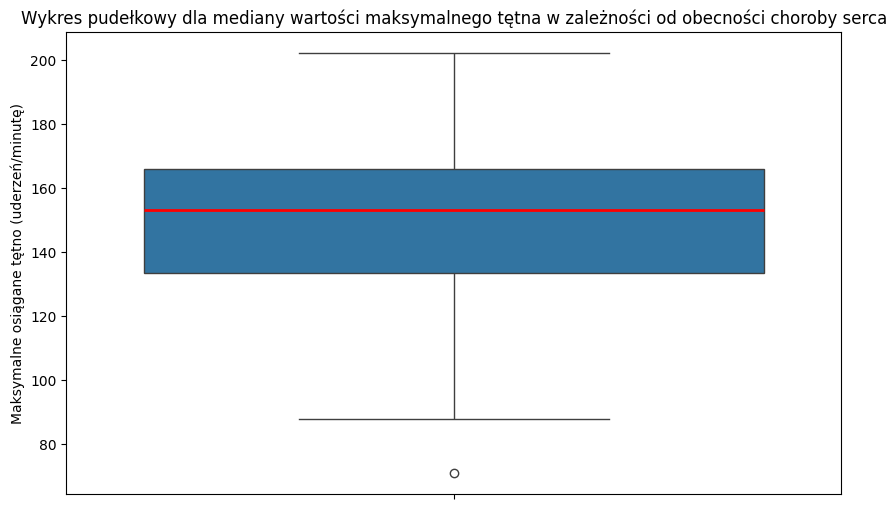

In [ ]:
#Wykres ramka-wąsy z uwzględnieniem mediany
plt.figure(figsize=(10, 6))
sns.boxplot(y='thalachh', data=data, medianprops={'color': 'red', 'linewidth': 2})
plt.title('Wykres pudełkowy dla mediany wartości maksymalnego tętna w zależności od obecności choroby serca')
plt.ylabel('Maksymalne osiągane tętno (uderzeń/minutę)')
plt.show()

Wykres pokazuje, że większość danych dotyczących maksymalnego osiąganego tętna skupia się wokół mediany i jest rozłożona dość symetrycznie w zakresie między 133 a 166 uderzeń na minutę. Istnieje jedna wartość odstająca na dolnym końcu rozkładu, wskazująca na pacjenta z wyjątkowo niskim maksymalnym tętnem w porównaniu do reszty grupy. Generalnie dane wskazują na stosunkowo równomierny rozkład maksymalnego tętna z lekkim przechyleniem w kierunku wyższych wartości (górny wąs delikatnie krótszy od dolnego - dane w trzecim kwantylu bardziej skoncentrowane).

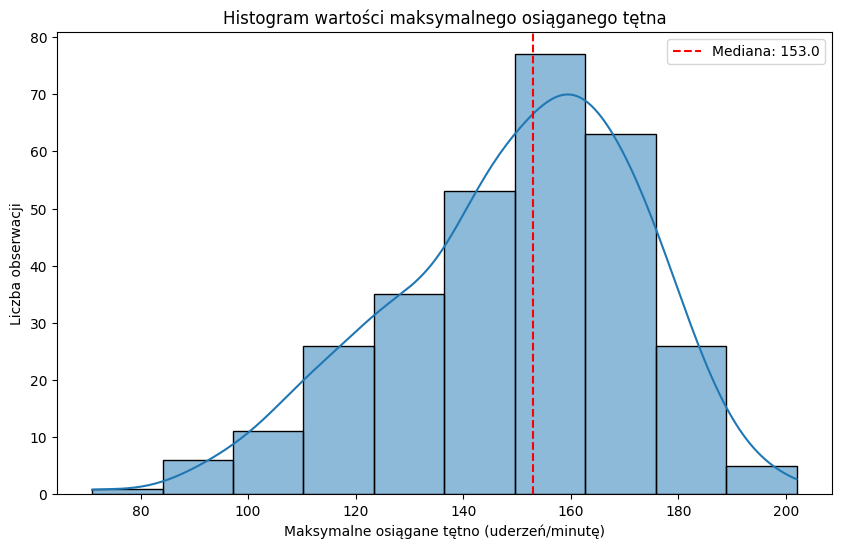

In [ ]:
#Tworzenie histogramu
plt.figure(figsize=(10, 6))
sns.histplot(data['thalachh'], bins=10, kde=True)
plt.axvline(x=mediana, color='red', linestyle='--', label=f'Mediana: {mediana}')
plt.title('Histogram wartości maksymalnego osiąganego tętna')
plt.xlabel('Maksymalne osiągane tętno (uderzeń/minutę)')
plt.ylabel('Liczba obserwacji')
plt.legend()
plt.show()

Powyżej widzimy histogram maksymalnego osiąganego tętna wraz z ilością obserwacji oraz zaznaczoną medianą. Widzimy, że histogram kształtem jest zbliżony do kształtu dla rozkładu normalnego (ale niecałkowicie - widoczna jest lekka asymetria w prawo, największa liczba obserwacji mieście się w przedziale 140-160 uderzeń/minutę). Widać na podstawie niego już wcześniej wskazane w statystykach opisowych elementy - mediana jest delikatnie przesunięta w prawo w stosunku do średniej.

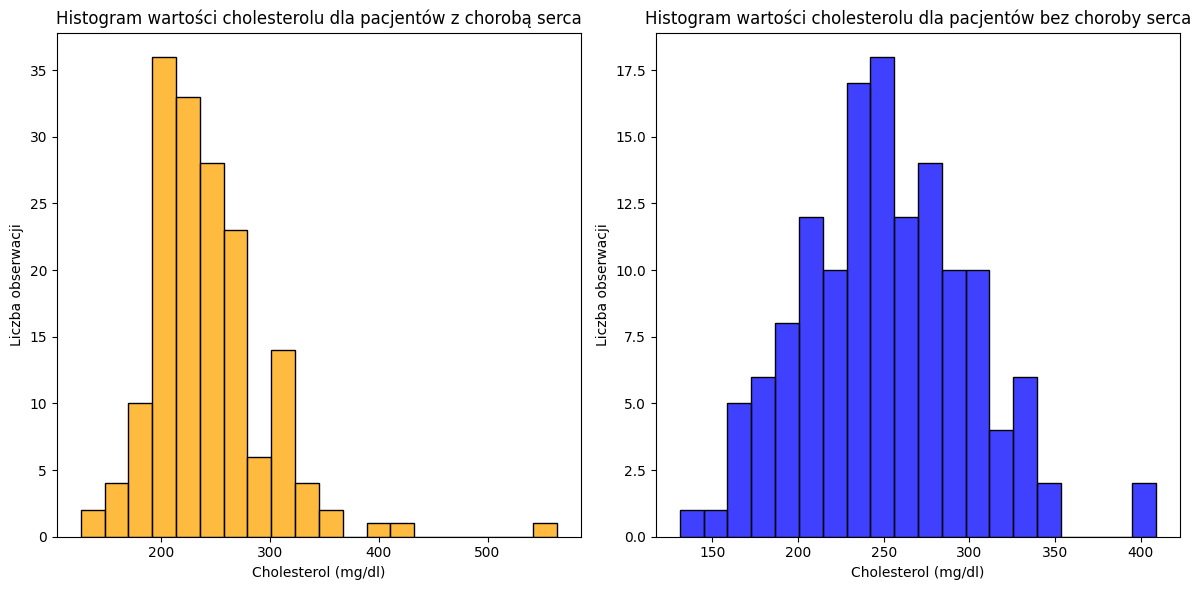

In [ ]:
plt.figure(figsize=(12, 6))

#Pierwszy histogram dla output=1 (chorzy)
plt.subplot(1, 2, 1)
sns.histplot(data[data['output'] == 1]['chol'], bins=20, color='orange', kde=False)
plt.title('Histogram wartości cholesterolu dla pacjentów z chorobą serca')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Liczba obserwacji')

#Drugi histogram dla output=0 (zdrowi)
plt.subplot(1, 2, 2)
sns.histplot(data[data['output'] == 0]['chol'], bins=20, color='blue', kde=False)
plt.title('Histogram wartości cholesterolu dla pacjentów bez choroby serca')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Liczba obserwacji')

plt.tight_layout()
plt.show()


Interpretując wartości na histogramach, dochodzimy do podobnych wniosków, jak dla wykresu ramka-wąsy. Widzimy, że pacjenci bez choroby serca znacznie częściej mają poziom cholesterolu z zakresu wyższego (około >=250mg/dl). Pacjenci ze zdiagnozowaną chorobą serca, mają poziom cholesterolu z zakresu niższego (<250mg/dl), poza niskoliczebnymi przypadkami skrajnymi. W przypadku grupy pacjentów niezdiagnozowanych wartości rozkładają się na wzór rozkładu normalnego, w przypadku zdiagnozowanych widać zdecydowanie większe skupienie i wzrost przy wartości 200mg/dl.

**Wykresy skategoryzowane dla maksymalnego osiąganego tętna.**


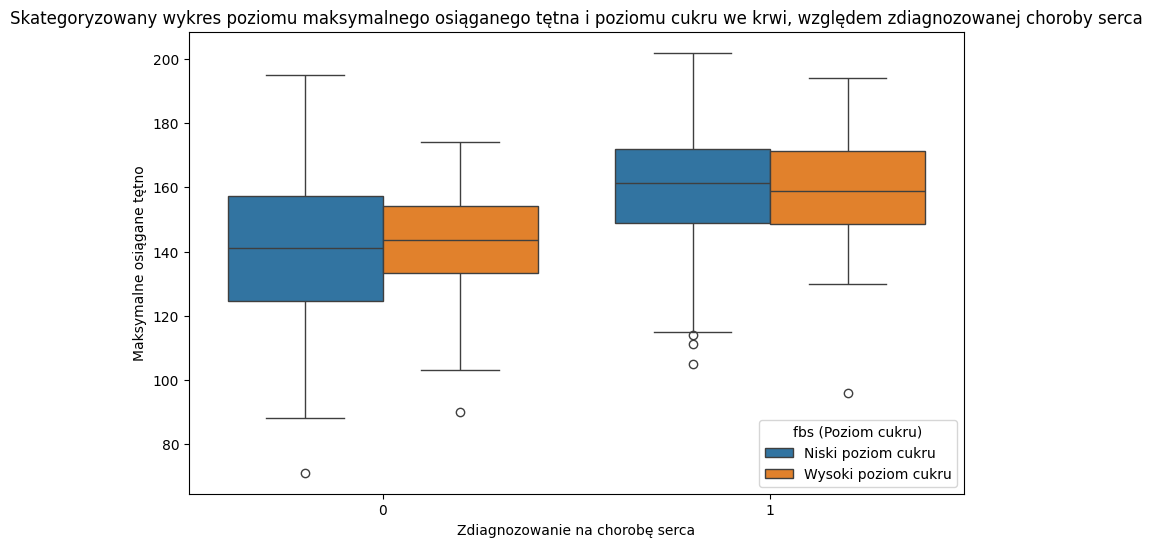

In [ ]:
#Wykres ramka-wąsy skategoryzowany
plt.figure(figsize=(10, 6))
sns.boxplot(x='output', y='thalachh', hue='fbs', data=data)
plt.xlabel('Zdiagnozowanie na chorobę serca')
plt.ylabel('Maksymalne osiągane tętno')
plt.title('Skategoryzowany wykres poziomu maksymalnego osiąganego tętna i poziomu cukru we krwi, względem zdiagnozowanej choroby serca')
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Niski poziom cukru', 'Wysoki poziom cukru']  # Przykładowe etykiety
plt.legend(handles, labels, title='fbs (Poziom cukru)', loc='lower right')
plt.show()

Patrząc na wykres, widzimy, że dla samej zmiennej thalachh mówiącej o maksymalnym osiąganym tętnie granice rozkładu osiągają wyższe wartości dla osób z chorobą serca, niż dla tych bez choroby serca. Uwzględniając dodatkowo poziom cukru we krwi na czczo zauważamy, że osoby z niskim poziomem cukru mają większy rozrzut w zakresie maksymalnego osiąganego tętna zarówno w przypadku ramki (kwantyle) jak i wąsa. Osoby z wysokim poziomem cukru mają ten rozrzut mniejszy, natomiast dolne granice rozrzutu są wyższe w porównaniu do osób o niskim poziomie cukru.

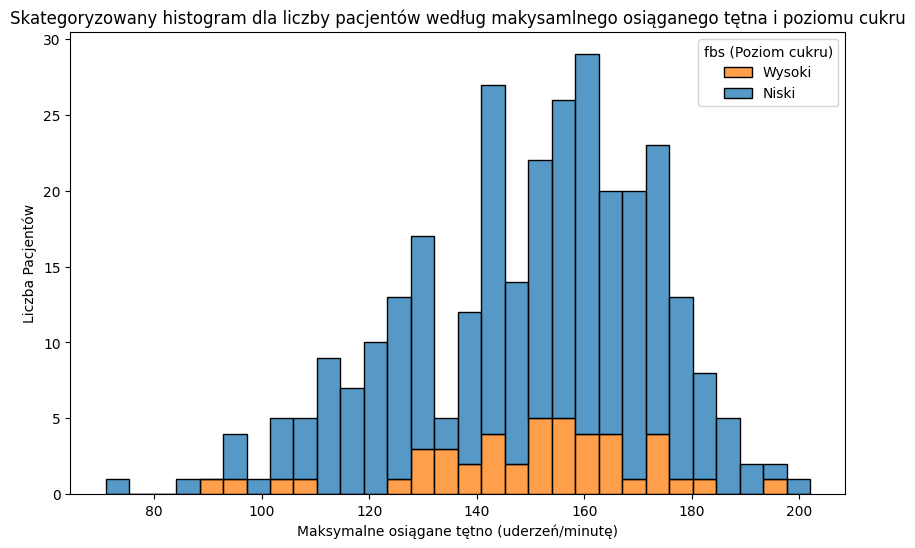

In [ ]:
#Histogram skategoryzowany
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='thalachh', hue='fbs', multiple='stack', bins=30)
plt.title('Skategoryzowany histogram dla liczby pacjentów według makysamlnego osiąganego tętna i poziomu cukru')
plt.xlabel('Maksymalne osiągane tętno (uderzeń/minutę)')
plt.ylabel('Liczba Pacjentów')
plt.legend(title='fbs (Poziom cukru)', labels=['Wysoki', 'Niski'])
plt.show()

Na podstawie wykresu widzimy, że wsród osób z wysokim poziomem cukru, większość ma tętno z zakresu 130-180 uderzeń/minutę. Wśród osób z prawdiłowym poziomem cukru, dużą część badanych stanowią osoby z poziomem cukru w zakresie 140-180 uderzeń/minutę, jednakże wyłania się druga mniejsza, ale wciąż znacząca grupa z zakresu 110-130 uderzeń/minutę. Widzimy dodatkowo, że osób z wysokim poziomem cukru jest zdecydowanie mniej, niż tych z prawidłowym cukrem.

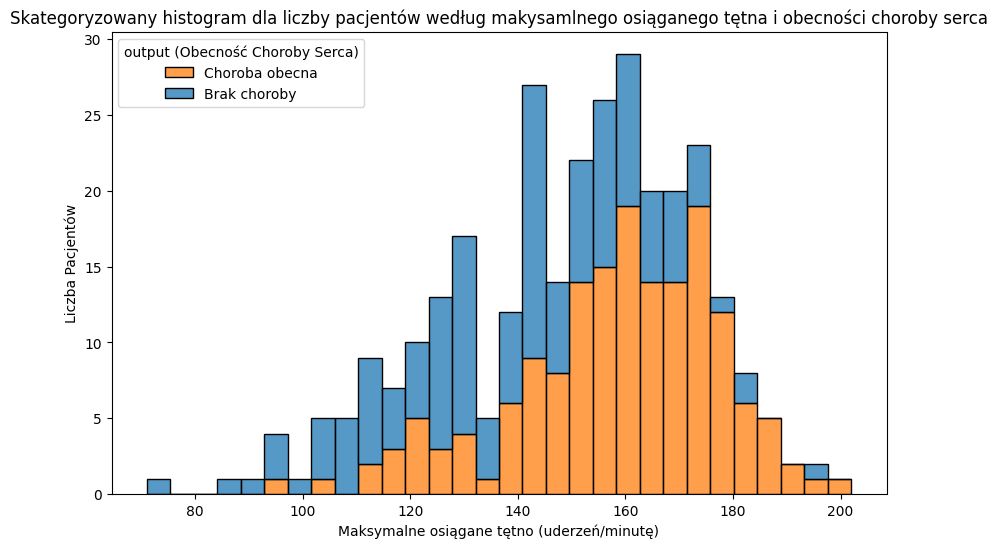

In [ ]:
#Histogram maksymalengo osiąganego tętna i obecności choroby serca
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='thalachh', hue='output', multiple='stack', bins=30)
plt.title('Skategoryzowany histogram dla liczby pacjentów według makysamlnego osiąganego tętna i obecności choroby serca')
plt.xlabel('Maksymalne osiągane tętno (uderzeń/minutę)')
plt.ylabel('Liczba Pacjentów')
plt.legend(title='output (Obecność Choroby Serca)', labels=['Choroba obecna', 'Brak choroby'])
plt.show()

Na wykresie widzimy, że wielu pacjentów z chorobą serca ma tętno mieszczące się w górnej części wszystkich możliwych otrzymanych wartości. Oczywiście Ci z wysokim tętnem, nadal nie stanowią większości na tle pacjentów niezdiagnozowanych, jednak można przypuszczać potencjalny związek tej cechy z faktem posiadania choroby serca.

<ipython-input-14-65ce670d68bc>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Nie', 'Tak'])


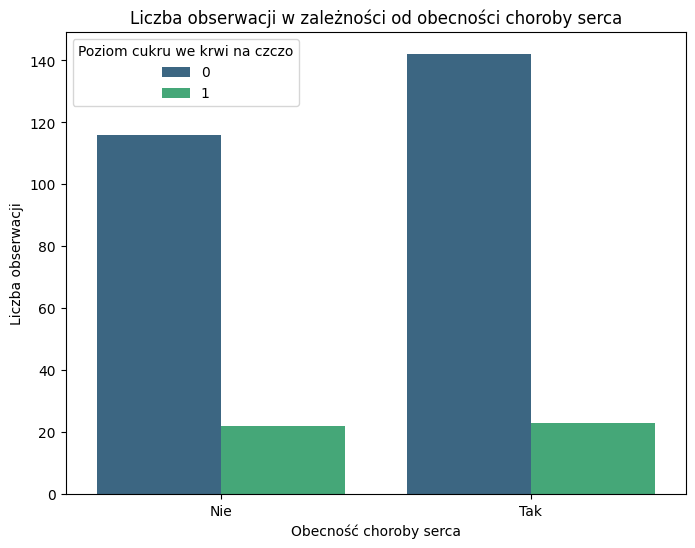

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='output', data=data, hue='fbs', palette='viridis')
ax.set_title('Liczba obserwacji w zależności od obecności choroby serca')
ax.set_xlabel('Obecność choroby serca')
ax.set_ylabel('Liczba obserwacji')
ax.set_xticklabels(['Nie', 'Tak'])
plt.legend(title='Poziom cukru we krwi na czczo')
plt.show()

Na podstawie wykresu słupkowego widzimy, że wysoki poziom cukru samodzielnie nie ma wpływu na obecność choroby serca. Pacjenci z wysokim cukrem i zdiagnozowaną chorobą serca stanowią niewiele ponad 20 osób. Zdecydowana większość chorych nie ma wysokiego poziomu cukru, warto też zauważyć, że w grupie pacjentów zdrowych, Ci z wysokim poziomem cukru stanowią większą część tej grupy.

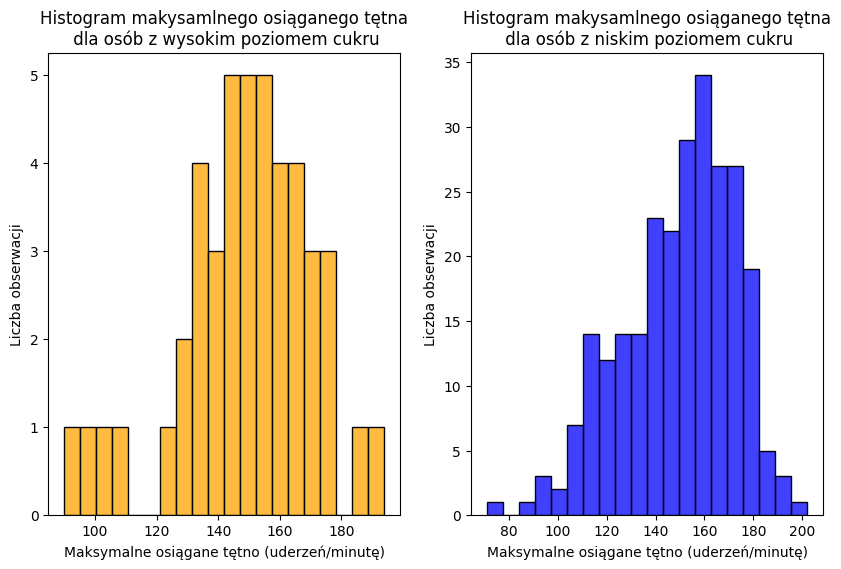

In [ ]:
#Histogramy pacjentów z niskim i wysokim cukrem z maksymalnym osiąganym tętnem
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.histplot(data[data['fbs'] == 1]['thalachh'], bins=20, color='orange', kde=False)
plt.title('Histogram makysamlnego osiąganego tętna\n dla osób z wysokim poziomem cukru')
plt.xlabel('Maksymalne osiągane tętno (uderzeń/minutę)')
plt.ylabel('Liczba obserwacji')
plt.subplot(1,2,2)
sns.histplot(data[data['fbs'] == 0]['thalachh'], bins=20, color='blue', kde=False)
plt.title('Histogram makysamlnego osiąganego tętna\n dla osób z niskim poziomem cukru')
plt.xlabel('Maksymalne osiągane tętno (uderzeń/minutę)')
plt.ylabel('Liczba obserwacji')
plt.show()

Histogramy pokazują nam rozkład ilości pacjentów w zależności od poziomu maksymalnego osiąganego tętna, każdy w swojej kategorii tj. z wysokim lub niskim poziomem cukru. Widzimy, że wśród osób z wyoskim cukrem, wielu ma tętno z zakresu stosunkowo wyższego (na tle uzyskanych ogólnie wartości) - 140-175 uderzeń/minutę, jednak dla osób z niskim cukrem sytuacja wygląda bardzo podobnie (około 20-30 przypadków tętna w normie z niższego zakresu 75-110 uderzeń/minutę - na tle całego zbioru nie ma to znaczenia).

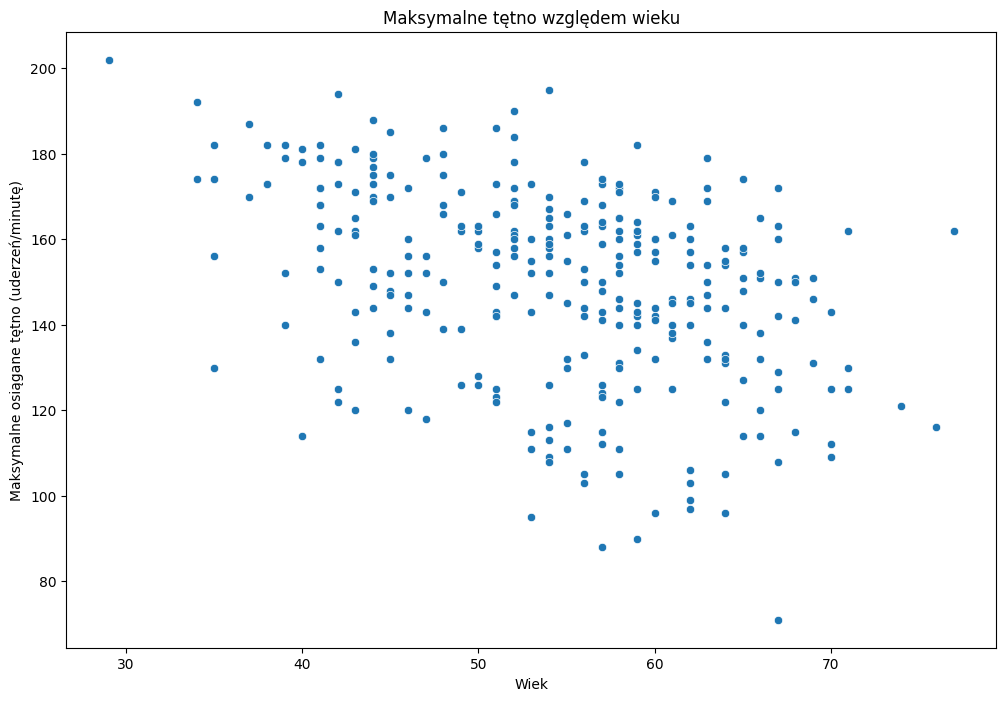

In [ ]:
#Wykres punktowy dla maksymalnego tętna i wieku
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='thalachh', data=data)
plt.title('Maksymalne tętno względem wieku')
plt.xlabel('Wiek')
plt.ylabel('Maksymalne osiągane tętno (uderzeń/minutę)')
plt.show()

Z wykresu punktowego widzimy, że dla osób w wieku 30-40 lat, tętno to zazwyczaj wysokie wartości z całego zbioru (>160 uderzeń/minutę). Wraz ze wzrostem wieku widać skupienie osiąganego tętna w coraz niższych wartościach (widoczna jest lekka tendencja spadkowa), są oczywiście także widoczne przypadki skrajne. Warto także dodać w kwestii wartości skrajnych, że wraz ze wzrostem wieku coraz częściej obserwowane są dolne wartości skrajne o niższych wartościach tętna, niż dla grup pacjentów z niższym wiekiem.

**Weryfikacja hipotezy o zgodności rozkładu zmiennej zależnej z rozkładem normalnym**

In [ ]:
#Weryfikacja hipotezy o zgodności rozkładu zmiennej zależnej z rozkładem normalnym - u nas zmiennej thalachh
#H0: Rozkład jest zbliżony do rozkładu normalnego (p>0.05)

stat, p_value = shapiro(data['thalachh'])

#Interpretacja wyniku testu
alpha = 0.05
print("Statystyka testowa: ", stat)
if p_value > alpha:
    print("Nie ma wystarczająco mocnych dowodów na to, aby odrzucić hipotezę o normalności rozkładu, p = ", p_value, ")")
else:
    print("Hipoteza o normalności rozkładu zostaje odrzucona p = ", p_value, ")")

Statystyka testowa:  0.9763153195381165
Hipoteza o normalności rozkładu zostaje odrzucona p =  6.620732165174559e-05 )


Wynik testu Shapiro-Wilka wskazuje na istotne statystycznie różnice w rozkładzie danych w porównaniu do rozkładu normalnego. Statystyka testowa wynosi 0.9763, a p-wartość (p = 6.62e-05) jest znacząco mniejsza niż ustalony poziom istotności (np. alpha = 0.05) (statystyka testowa w teście Shapiro-Wilka mierzy stopień odstępstwa danych od rozkładu normalnego, im wyższa wartość statystyki testowej, tym bliżej dane są do rozkładu normalnego - w naszym przypadku wciąż zbyt daleka w stosunku do założonej istotności).

**Sprawdzenie, czy istnieje związek korelacyjny między badanymi zmiennymi**

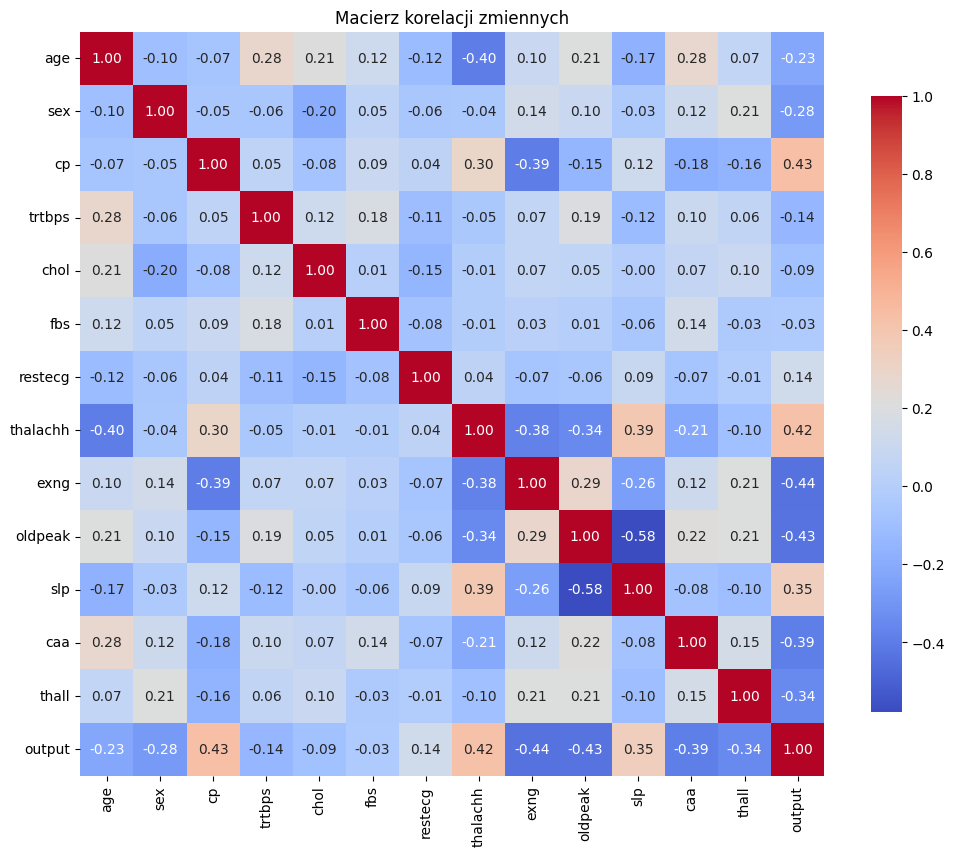

In [ ]:
#Macierz korelacji zmiennych
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Macierz korelacji zmiennych')
plt.show()

Korelacja między zmiennymi całościowo jest przeciętna, w pojedyńczych przypadkach osiąga wartości z zakresu 0,4-0,6. Najmocniejsze korelacje ujemne obserwujemy między zmiennymi oldpeak-output (element badania EKG-obecność choroby serca), output-exng (obecność choroby serca-dławica piersiowa) oraz slp-oldpeak (element badania EKG-element badania EKG). Najmocniejsze korelacje dodatnie to cp-output(rodzaj bólu w klatce piersiowej-obecność choroby serca), output-thalachh(obecność choroby serca-maksymalne osiągane tętno).

**Podział na zbiór testowy i treningowy**

In [ ]:
X = data[['output','age', 'slp', 'exng', 'cp']]  #Zmienne objaśniające
y = data['thalachh']  #Zmienna objaśniana - thalachh

#Podział zbioru na treningowy i testowy (80% trening, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Wyświetlanie rozmiaru podzielonych zbiorów
print(f'Rozmiar zbioru treningowego: {X_train.shape[0]} próbek')
print(f'Rozmiar zbioru testowego: {X_test.shape[0]} próbek')

Rozmiar zbioru treningowego: 242 próbek
Rozmiar zbioru testowego: 61 próbek


**Budowa modelu regresji liniowej**

In [ ]:
#Budowa modelu regresji
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Współczynniki dla kolejnych zmiennych objaśniających - wskazują jak zmieniłaby się zmienna output, gdyby dana zmienna
#zmieniła się o jednostkę
model.coef_

array([  5.65051635,  -0.71901046,   6.23771953, -10.2103188 ,
         2.46984941])

In [ ]:
#Współczynniki modelu
print(f'Współczynniki regresji: {model.coef_}')
print(f'Wyraz wolny: {model.intercept_}')

Współczynniki regresji: [  5.65051635  -0.71901046   6.23771953 -10.2103188    2.46984941]
Wyraz wolny: 178.05985130152388


In [ ]:
#Predykcja na zbiorze testowym
predcitions_test = model.predict(X_test)
results_test = pd.DataFrame({'Rzeczywiste wartości': y_test, 'Przewidywane wartości': predcitions_test})
results_test.head()

,Rzeczywiste wartości,Przewidywane wartości
179,112,133.103656
228,159,149.285502
111,173,160.141909
246,150,133.822666
60,130,150.075763


In [ ]:
#Predykcja na zbiorze treningowym
predcitions_train = model.predict(X_train)
results_train = pd.DataFrame({'Rzeczywiste wartości': y_train, 'Przewidywane wartości': predcitions_train})
results_train.head()

,Rzeczywiste wartości,Przewidywane wartości
132,162,168.457217
202,111,138.622365
196,147,156.162789
75,161,152.872361
176,160,137.184344


In [ ]:
#Metryki do oceny jakości modelu
R2_train = r2_score(y_true = y_train, y_pred = predcitions_train)
R2_test = r2_score(y_true = y_test, y_pred = predcitions_test)

MAE_train = mean_absolute_error(y_true = y_train, y_pred = predcitions_train)
MAE_test = mean_absolute_error(y_true = y_test, y_pred = predcitions_test)

MSE_train = mean_squared_error(y_true = y_train, y_pred = predcitions_train)
MSE_test = mean_squared_error(y_true = y_test, y_pred = predcitions_test)

RMSE_train = mean_squared_error(y_true = y_train, y_pred = predcitions_train, squared = False)
RMSE_test = mean_squared_error(y_true = y_test, y_pred = predcitions_test, squared = False)

print('R2_train: ', R2_train, '  R2_test: ', R2_test)
print('MAE_train: ', MAE_train, '  MAE_test: ', MAE_test)
print('MSE_train: ', MSE_train, '  MSE_test: ', MSE_test)
print('RMSE_train: ', RMSE_train, '  RMSE_test: ', RMSE_test)

R2_train:  0.34026988698610916   R2_test:  0.44744774270593457
MAE_train:  14.09040710031549   MAE_test:  14.404979976709143
MSE_train:  328.25869636769045   MSE_test:  342.1134503074496
RMSE_train:  18.117910927247944   RMSE_test:  18.49630909958659


R^2 dla danych treningowych wynosi 0.340, co oznacza, że model wyjaśnia 34.0% wariancji w danych treningowych. R^2 dla danych testowych wynosi 0.447, co oznacza, że model wyjaśnia 44.7% wariancji w danych testowych. Wartości te sugerują, że model ma umiarkowaną zdolność do wyjaśniania zmienności w danych. R^2 dla danych testowych jest nieco wyższe niż dla danych treningowych, co jest nietypowe, ale może wskazywać na to, że model nie jest przeuczony i dobrze interpretuje na nowe dane. Średni błąd bezwzględny (MAE) dla danych treningowych wynosi 14.090, a dla danych testowych 14.405. Wartości te są zbliżone, co sugeruje, że model ma podobną dokładność na danych treningowych i testowych. MAE daje nam średnią wielkość błędu w jednostkach zmiennej zależnej, co może być łatwiejsze do zinterpretowania w kontekście konkretnego problemu. Średni błąd kwadratowy (MSE) dla danych treningowych wynosi 328.259, a dla danych testowych 342.113. MSE daje większą wagę większym błędom (z powodu podnoszenia do kwadratu). Wartości te są również zbliżone dla danych treningowych i testowych, co wskazuje na brak nadmiernego dopasowania modelu. Pierwiastek średniego błędu kwadratowego (RMSE) dla danych treningowych wynosi 18.118, a dla danych testowych 18.496. RMSE jest miarą błędu w tych samych jednostkach co zmienna zależna. Zbliżone wartości RMSE dla danych treningowych i testowych wskazują na spójną wydajność modelu na obu zestawach danych. Podsumowując, model wykazuje umiarkowaną zdolność wyjaśniania zmienności w danych (R^2 na poziomie około 0.34-0.45). Miary błędów (MAE, MSE, RMSE) są podobne dla danych treningowych i testowych, co sugeruje, że model dobrze generalizuje i nie jest przeuczony.